# Number Recognition System( Using ANN )
#Here I make a project on number recognition system on MNSIT dataset using keras ,there will be details of each step such that you understand that code efficiently


# Lets Get Started

In [52]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [22]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()
#preinstalled data set in the keras library.Infact we dont need to use train_test_split method in this case

In [23]:
X_train.shape


(60000, 28, 28)

In [24]:
X_test.shape

(10000, 28, 28)

In [25]:
#basically test_size=0.167 by default

In [26]:
y_train # the output column with predicted numbers (0-9)

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

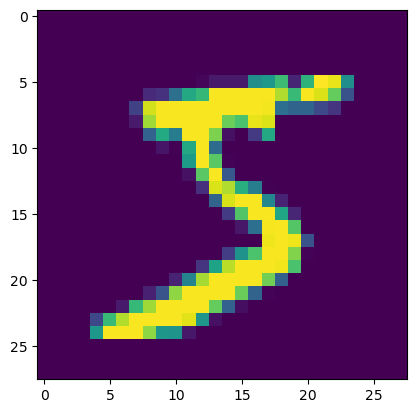

In [27]:
# lets see that number visually
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [28]:
X_train[0] #basically a array of 28*28 (pixels)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [29]:
#now we have to scaled the data in X ,basically have to standarize it
X_train=X_train/255
X_test=X_test/255


# Creating the Neural Network

In [30]:
# lets create the neural network
model=Sequential()
model.add(Flatten(input_shape=(28,28)))# as it is a 28*28 matrix we have to flat it or onvert it into 1-D array for input layer
model.add(Dense(128,activation='relu'))#hidden layer 1 with 128 nodes
model.add(Dense(32,activation='relu'))#hidden layer 2 with 32 nodes
model.add(Dense(10,activation='softmax'))#hidden layer 3 with 10 nodes

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 32)                4128      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')# we use that loss function such that we dont require to use one hot encoding

In [47]:
model.fit(X_train,y_train,epochs=15,validation_split=0.2)#using validation to check overfitting

Epoch 1/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0162 - val_loss: 0.1069
Epoch 2/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0156 - val_loss: 0.1276
Epoch 3/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0144 - val_loss: 0.1526
Epoch 4/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0139 - val_loss: 0.1312
Epoch 5/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0114 - val_loss: 0.1310
Epoch 6/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0093 - val_loss: 0.1530
Epoch 7/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0133 - val_loss: 0.1303
Epoch 8/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0113 - val_loss: 0.1380
Epoch 9/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0073 - val_loss: 0.1638
Epoch 10/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.009

In [48]:
y_pred=model.predict(X_test)
y_pred.shape# a matrix of probablites of all numbers 0-9

313/313 [==============================] - 0s 1ms/step


(10000, 10)

In [49]:
# so we have to find the index with maximum probablity in each row
y_pred=y_pred.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

# Accuracy Check

In [50]:
#calculating accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9756